#### Andrew Taylor
#### atayl136
#### EN705.601 Applied Machine Learning
## Homework 11

### Question 1: Apriori Analysis of Alice in Wonderland

The snippet provided uses the NLTK library to process the text and filter out stopwords and non-alphabetic terms. Let's build upon this to perform Apriori analysis.  

Firstly, we need to understand the Apriori algorithm's goal: to find frequent itemsets in a dataset and then deduce association rules from these itemsets. In the context of text analysis, an "itemset" could be a set of words that frequently occur together in sentences.  

Here's a step-by-step approach:  

Preprocess the Text: Your code snippet already handles this by loading the sentences from the book and filtering out stopwords and non-alphabetic terms.  

Transform Sentences into Itemsets: We will convert each sentence into an itemset of words. This step seems to be already covered in your code.  

Apply the Apriori Algorithm: We will need a library like mlxtend to apply the Apriori algorithm. This algorithm will help us find frequent word sets in the text.  

Generate Association Rules: From the frequent itemsets, we can generate association rules. These rules will tell us which words (or sets of words) are likely to appear together.  

Analyze the Results: We will interpret the rules to understand the associations between different words in the text.  

In [3]:
# Question 1: Apriori analysis of Alice in Wonderland

import pandas as pd
import nltk
nltk.download('gutenberg')
nltk.download('stopwords')
nltk.download('punkt')
import re
from nltk.corpus import gutenberg, stopwords
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 1: Preprocess the Text
stop_words = stopwords.words('english')
sentences = gutenberg.sents('carroll-alice.txt')
terms_sentences = [[w.lower() for w in terms if w.lower() not in stop_words and re.search(r'^[a-zA-Z]{2,}$', w)]
                   for terms in sentences]

# Step 2: Transform Sentences into Itemsets
te = TransactionEncoder()
te_ary = te.fit(terms_sentences).transform(terms_sentences)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Step 3: Apply the Apriori Algorithm
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Step 4: Generate Association Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Step 5: Analyze the Results
# Displaying top 20 rules
print(rules.head(20))


[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Putna\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Putna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Putna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


       antecedents consequents  antecedent support  consequent support  \
0         (looked)     (alice)            0.025250            0.228420   
1           (much)     (alice)            0.029360            0.228420   
2          (quite)     (alice)            0.029360            0.228420   
3        (thought)     (alice)            0.043453            0.228420   
4            (cat)      (said)            0.021139            0.267176   
5    (caterpillar)      (said)            0.015854            0.267176   
6           (hare)     (march)            0.017616            0.018203   
7          (march)      (hare)            0.018203            0.017616   
8         (hatter)      (said)            0.032883            0.267176   
9           (king)      (said)            0.035232            0.267176   
10          (mock)      (said)            0.032883            0.267176   
11        (turtle)      (mock)            0.034058            0.032883   
12          (mock)    (turtle)        

### Analysis of Results  

Confidence and Lift: The 'confidence' and 'lift' columns are key indicators. A high confidence value means that when the antecedent occurs, the consequent is very likely to occur as well. The lift measures how much more often the antecedent and consequent occur together than expected if they were statistically independent. A lift value greater than 1 indicates a positive association.  

Notable Associations:  

("looked", "alice"), ("much", "alice"), and ("quite", "alice") have high confidence and lift values, indicating these words frequently occur together.  
("hare", "march") and its converse ("march", "hare") show a perfect confidence of 1 and an extremely high lift, indicating a very strong association, likely due to the characters "March Hare" in the story.  
("turtle", "mock") and its converse also show a very strong association with high confidence and lift, likely referring to the "Mock Turtle" character.  
Leverage and Conviction: These are additional measures of the strength of an association. Leverage measures the difference in frequency of occurrence of the itemset compared to what would be expected if they were independent. Conviction can be seen as a measure of the implication's strength.  

Filtering for Top Associations  
To filter for top associations between one word and two words, we can apply conditions on the antecedents and consequents in the dataset. For example, let's find rules where the antecedent is a single word and the consequent is two words (or vice versa):

In [4]:
# Filtering for associations where antecedent is one word and consequent is two words
one_to_two = rules[rules['antecedents'].apply(lambda x: len(x) == 1) & rules['consequents'].apply(lambda x: len(x) == 2)]

# Filtering for associations where antecedent is two words and consequent is one word
two_to_one = rules[rules['antecedents'].apply(lambda x: len(x) == 2) & rules['consequents'].apply(lambda x: len(x) == 1)]

# Combine both filters to get the desired results
filtered_rules = pd.concat([one_to_two, two_to_one])

# Display the filtered results
print(filtered_rules)


       antecedents     consequents  antecedent support  consequent support  \
20        (turtle)    (said, mock)            0.034058            0.018790   
21          (mock)  (turtle, said)            0.032883            0.018790   
17  (turtle, said)          (mock)            0.018790            0.032883   
18  (turtle, mock)          (said)            0.032883            0.267176   
19    (said, mock)        (turtle)            0.018790            0.034058   

    support  confidence       lift  leverage  conviction  zhangs_metric  
20  0.01879    0.551724  29.362069  0.018150    2.188852       1.000000  
21  0.01879    0.571429  30.410714  0.018172    2.289489       1.000000  
17  0.01879    1.000000  30.410714  0.018172         inf       0.985637  
18  0.01879    0.571429   2.138776  0.010005    1.709924       0.550546  
19  0.01879    1.000000  29.362069  0.018150         inf       0.984440  


As hinted in the assignment instructions, Mock Turtle and White Rabbit were some of our stronger associations. If we wanted to delve deeper we could focus on the top 50 rules to get the most color out of Carroll's style. This was a very interesting module and I wonder if it could be applied to the stock market, by dividing patterns and results over a specified time period. Transactions would be sequences of ticks or returns, and high confidence/lift rules would reveal winning trades.

### Question 2: 2-Layer Deep NN

For this question let's get the MNIST data set loaded first, and get a single layer MLP working, and then create a 2-layer NN and see the performance difference.

In [6]:
# Question 2: Start with the data set

def load_mnist(path, kind='train'):
    from numpy import fromfile, uint8
    import os
    import struct
    
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = fromfile(lbpath, dtype=uint8)
        with open(images_path, 'rb') as imgpath:
            magic, num, rows, cols = struct.unpack(">IIII",imgpath.read(16))
            images = fromfile(imgpath, dtype=uint8).reshape(len(labels), 784)
            images = ((images / 255.) - .5) * 2
    return images, labels

X_train_mnist, y_train_mnist = load_mnist('./EP_datasets/mnist/', kind='train')
print(f'Rows= {X_train_mnist.shape[0]}, columns= {X_train_mnist.shape[1]}')

X_test_mnist, y_test_mnist = load_mnist('./EP_datasets/mnist/', kind='t10k')
print(f'Rows= {X_test_mnist.shape[0]}, columns= {X_test_mnist.shape[1]}')

Rows= 60000, columns= 784
Rows= 10000, columns= 784


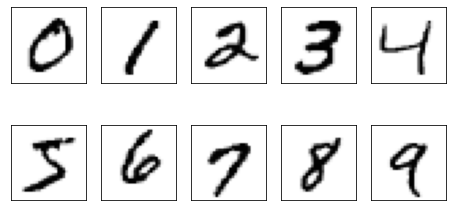

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import ranf
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

_, ax = plt.subplots(nrows=2, ncols=5, sharex='all', sharey='all', dpi=72)
ax = ax.flatten()
for img_i in range(10):
    img = X_train_mnist[y_train_mnist == img_i][0].reshape(28, 28)
    ax[img_i].imshow(img, cmap='Greys')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
plt.show()

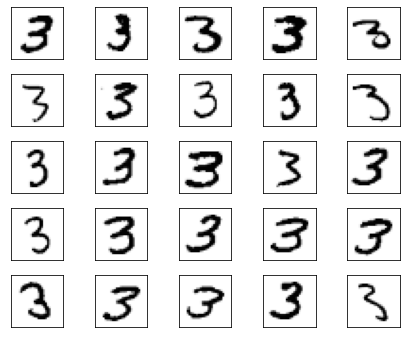

In [10]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex='all', sharey='all', dpi=72)
ax = ax.flatten()
for img_i in range(25):
    img = X_train_mnist[y_train_mnist == 3][img_i].reshape(28, 28)
    ax[img_i].imshow(img, cmap='Greys')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
plt.show()

In [11]:
from sklearn.metrics import confusion_matrix

def get_acc(_y_test, _y_pred):
    return (np.sum(_y_test == _y_pred)).astype(float) / _y_test.shape[0]

In [12]:
# NN Code as provided

class NeuralNetMLP(object):

    def __init__(self, n_hidden=30, epochs=100, eta=0.001, minibatch_size=1, seed=None):
        self.random = np.random.RandomState(seed)  # used to randomize weights
        self.n_hidden = n_hidden  # size of the hidden layer
        self.epochs = epochs  # number of iterations
        self.eta = eta  # learning rate
        self.minibatch_size = minibatch_size  # size of training batch - 1 would not work
        self.w_out, self.w_h = None, None
    
    @staticmethod
    def onehot(_y, _n_classes):  # one hot encode the input class y
        onehot = np.zeros((_n_classes, _y.shape[0]))
        for idx, val in enumerate(_y.astype(int)):
            onehot[val, idx] = 1.0
        return onehot.T
    
    @staticmethod
    def sigmoid(_z):  # Eq 1
        return 1.0 / (1.0 + np.exp(-np.clip(_z, -250, 250)))

    def _forward(self, _X):  # Eq 2
        z_h = np.dot(_X, self.w_h)
        a_h = self.sigmoid(z_h)
        z_out = np.dot(a_h, self.w_out)
        a_out = self.sigmoid(z_out)
        return z_h, a_h, z_out, a_out

    @staticmethod
    def compute_cost(y_enc, output):  # Eq 4
        term1 = -y_enc * (np.log(output))
        term2 = (1.0-y_enc) * np.log(1.0-output)
        cost = np.sum(term1 - term2)
        return cost

    def predict(self, _X):
        z_h, a_h, z_out, a_out = self._forward(_X)
        ypred = np.argmax(z_out, axis=1)
        return ypred

    def fit(self, _X_train, _y_train, _X_valid, _y_valid):
        import sys
        n_output = np.unique(_y_train).shape[0]  # number of class labels
        n_features = _X_train.shape[1]
        self.w_out = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden, n_output))
        self.w_h = self.random.normal(loc=0.0, scale=0.1, size=(n_features, self.n_hidden))
        y_train_enc = self.onehot(_y_train, n_output)  # one-hot encode original y
        for ei in range(self.epochs):  # Ideally must shuffle at every epoch
            indices = np.arange(_X_train.shape[0])
            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]
                
                z_h, a_h, z_out, a_out = self._forward(_X_train[batch_idx])  # neural network model
                
                sigmoid_derivative_h = a_h * (1.0-a_h)  # Eq 3
                delta_out = a_out - y_train_enc[batch_idx]  # Eq 5
                delta_h = (np.dot(delta_out, self.w_out.T) * sigmoid_derivative_h)  # Eq 6
                grad_w_out = np.dot(a_h.T, delta_out)  # Eq 7
                grad_w_h = np.dot(_X_train[batch_idx].T, delta_h)  # Eq 8
                self.w_out -= self.eta*grad_w_out  # Eq 9
                self.w_h -= self.eta*grad_w_h  # Eq 9

            # Evaluation after each epoch during training
            z_h, a_h, z_out, a_out = self._forward(_X_train)
            cost = self.compute_cost(y_enc=y_train_enc, output=a_out)
            y_train_pred = self.predict(_X_train)  # monitoring training progress through reclassification
            y_valid_pred = self.predict(_X_valid)  # monitoring training progress through validation
            train_acc = ((np.sum(_y_train == y_train_pred)).astype(float) / _X_train.shape[0])
            valid_acc = ((np.sum(_y_valid == y_valid_pred)).astype(float) / _X_valid.shape[0])
            sys.stderr.write('\r%d/%d | Cost: %.2f ' '| Train/Valid Acc.: %.2f%%/%.2f%% '%
                (ei+1, self.epochs, cost, train_acc*100, valid_acc*100))
            sys.stderr.flush()
        return self

In [13]:
# Define and fit the neural network
nn = NeuralNetMLP(n_hidden=20, epochs=300, eta=0.0005, minibatch_size=100, seed=1)

nn.fit(X_train_mnist[:55000], y_train_mnist[:55000], X_train_mnist[55000:], y_train_mnist[55000:]) ;

300/300 | Cost: 15436.03 | Train/Valid Acc.: 96.21%/95.50% 

In [14]:
y_pred = nn.predict(X_test_mnist)

print(f'Accuracy= {get_acc(y_test_mnist, y_pred)*100:.2f}%')
print(confusion_matrix(y_test_mnist, y_pred))

Accuracy= 94.12%
[[ 959    0    1    0    4    1    9    1    5    0]
 [   0 1100    3    2    1    0    5    1   23    0]
 [  14    0  961   13    4    0    9   11   20    0]
 [   2    3   13  955    0   13    1    7   10    6]
 [   0    2    2    1  937    1    5    6    4   24]
 [   8    5    2   39    6  775   13    9   27    8]
 [  13    4    4    0    6   14  903    1   13    0]
 [   3    6   13    7    3    0    0  980    4   12]
 [   3    4    6   12    9    6    5   11  915    3]
 [   4    5    0   17   24    4    1   21    6  927]]


### Creating a 2-layer NN

I will do this by:  

Initialize Additional Weights: Add an initialization for the second layer's weights.  
Modify Forward Pass: Update the forward propagation method to include the second hidden layer.  
Update Backpropagation: Adjust the backpropagation algorithm to account for the additional layer.  
Additional Activation Functions: Add different activation functions for each layer.  

In [23]:
# 2-layer Neural Network


class NeuralNetMLP(object):

    def __init__(self, n_hidden1=30, n_hidden2=30, epochs=100, eta=0.001, minibatch_size=1, seed=None):
        self.random = np.random.RandomState(seed)
        self.n_hidden1 = n_hidden1  # size of the first hidden layer
        self.n_hidden2 = n_hidden2  # size of the second hidden layer
        self.epochs = epochs
        self.eta = eta
        self.minibatch_size = minibatch_size
        self.w_h1, self.w_h2, self.w_out = None, None, None  # Initialize additional weight matrix

    
    @staticmethod
    def onehot(_y, _n_classes):  # one hot encode the input class y
        onehot = np.zeros((_n_classes, _y.shape[0]))
        for idx, val in enumerate(_y.astype(int)):
            onehot[val, idx] = 1.0
        return onehot.T
    
    @staticmethod
    def sigmoid(_z):  # Eq 1
        return 1.0 / (1.0 + np.exp(-np.clip(_z, -250, 250)))

    def _forward(self, _X):
        # First hidden layer
        z_h1 = np.dot(_X, self.w_h1)
        a_h1 = self.sigmoid(z_h1)

        # Second hidden layer
        z_h2 = np.dot(a_h1, self.w_h2)
        a_h2 = self.sigmoid(z_h2)

        # Output layer
        z_out = np.dot(a_h2, self.w_out)
        a_out = self.sigmoid(z_out)

        return z_h1, a_h1, z_h2, a_h2, z_out, a_out

    @staticmethod
    def compute_cost(y_enc, output):  # Eq 4
        term1 = -y_enc * (np.log(output))
        term2 = (1.0-y_enc) * np.log(1.0-output)
        cost = np.sum(term1 - term2)
        return cost

    def predict(self, _X):
        z_h1, a_h1, z_h2, a_h2, z_out, a_out = self._forward(_X)
        ypred = np.argmax(z_out, axis=1)
        return ypred

    def fit(self, _X_train, _y_train, _X_valid, _y_valid):
        import sys
        n_output = np.unique(_y_train).shape[0]  # number of class labels
        n_features = _X_train.shape[1]
        self.w_h1 = self.random.normal(loc=0.0, scale=0.1, size=(n_features, self.n_hidden1))
        self.w_h2 = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden1, self.n_hidden2))
        self.w_out = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden2, n_output))
        y_train_enc = self.onehot(_y_train, n_output)  # one-hot encode original y
        for ei in range(self.epochs):
            indices = np.arange(_X_train.shape[0])

            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
                    batch_idx = indices[start_idx:start_idx + self.minibatch_size]

                    # Forward pass
                    z_h1, a_h1, z_h2, a_h2, z_out, a_out = self._forward(_X_train[batch_idx])

                    # Backpropagation
                    # Step 1: Output layer error
                    delta_out = a_out - y_train_enc[batch_idx]  

                    # Step 2: Error for the second hidden layer
                    sigmoid_derivative_h2 = a_h2 * (1.0 - a_h2)
                    delta_h2 = np.dot(delta_out, self.w_out.T) * sigmoid_derivative_h2

                    # Step 3: Error for the first hidden layer
                    sigmoid_derivative_h1 = a_h1 * (1.0 - a_h1)
                    delta_h1 = np.dot(delta_h2, self.w_h2.T) * sigmoid_derivative_h1

                    # Step 4: Gradient computation
                    grad_w_out = np.dot(a_h2.T, delta_out)
                    grad_w_h2 = np.dot(a_h1.T, delta_h2)
                    grad_w_h1 = np.dot(_X_train[batch_idx].T, delta_h1)

                    # Update weights
                    self.w_out -= self.eta * grad_w_out
                    self.w_h2 -= self.eta * grad_w_h2
                    self.w_h1 -= self.eta * grad_w_h1
                    
            # Evaluation after each epoch during training
            z_h1, a_h1, z_h2, a_h2, z_out, a_out = self._forward(_X_train)
            cost = self.compute_cost(y_enc=y_train_enc, output=a_out)
            y_train_pred = self.predict(_X_train)  # monitoring training progress through reclassification
            y_valid_pred = self.predict(_X_valid)  # monitoring training progress through validation
            train_acc = ((np.sum(_y_train == y_train_pred)).astype(float) / _X_train.shape[0])
            valid_acc = ((np.sum(_y_valid == y_valid_pred)).astype(float) / _X_valid.shape[0])
            sys.stderr.write('\r%d/%d | Cost: %.2f ' '| Train/Valid Acc.: %.2f%%/%.2f%% '%
                (ei+1, self.epochs, cost, train_acc*100, valid_acc*100))
            sys.stderr.flush()
        return self

In [24]:
# Define and fit the 2 layer neural network, increased by another 20 hidden units
nn2 = NeuralNetMLP(n_hidden1=20, n_hidden2=20, epochs=300, eta=0.0005, minibatch_size=100, seed=1)

nn2.fit(X_train_mnist[:55000], y_train_mnist[:55000], X_train_mnist[55000:], y_train_mnist[55000:]) ;

300/300 | Cost: 7923.15 | Train/Valid Acc.: 98.07%/95.78%  

In [25]:
y_pred = nn2.predict(X_test_mnist)

print(f'Accuracy= {get_acc(y_test_mnist, y_pred)*100:.2f}%')
print(confusion_matrix(y_test_mnist, y_pred))

Accuracy= 95.19%
[[ 955    0    2    0    2    4    6    4    7    0]
 [   0 1111    3    2    1    1    2    4   11    0]
 [   5    1  969   14    5    0    4   14   19    1]
 [   3    1   11  957    0   15    0    7   11    5]
 [   2    0    3    0  939    0    9    2    5   22]
 [   5    2    1   21    2  826    5    7   15    8]
 [   5    3    3    0    6   11  926    0    4    0]
 [   0    3   13   10    4    0    0  976    3   19]
 [   6    2    3    6    8    8    8   10  916    7]
 [   2    3    0    9   19    6    3   12   11  944]]


### Results

A second layer of another 30 hidden units reduced cost from 15436.03 to 7923.15 and increased training accuracy to 98.07% from 96.21% and validation accuracy to 95.78% from 95.50% - a modest increase. Presumably, increasing layers and nodes would improve performance even further, on the way to an overfit.